In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np

In [32]:
def f(x):    
    return 2 * x + 5
def f2(x):
    return 2*np.sin(x)+5
def f3(x):
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)
f2 = np.vectorize(f2)
f3 = np.vectorize(f3)

In [37]:
x = np.linspace(-3, 3, 1000).reshape(-1, 1)
y=f(x)

In [17]:
def baseline_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


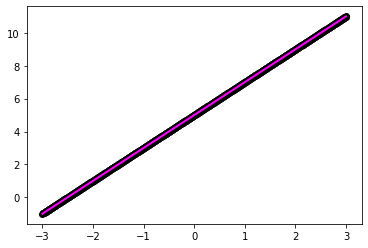

[array([[1.9999998]], dtype=float32), array([4.999989], dtype=float32)]


In [38]:
%time
model = baseline_model()
model.fit(x, y, epochs=100, verbose = 0)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='magenta', linewidth=2)
plt.show()
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

##### F2

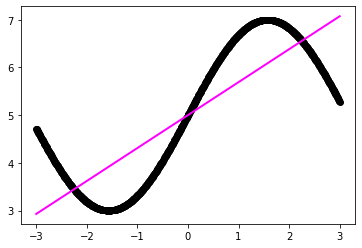

[array([[0.6904491]], dtype=float32), array([5.000991], dtype=float32)]


In [41]:
y=f2(x)
model = baseline_model()
model.fit(x,y,epochs=100,verbose=0)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='magenta', linewidth=2)
plt.show()
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

In [54]:
def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=100, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

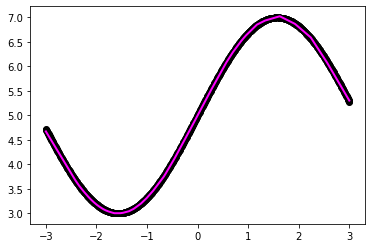

In [55]:
y=f2(x)
model = baseline_model()
model.fit(x,y,epochs=100,verbose=0)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='magenta', linewidth=2)
plt.show()

##### F3

In [79]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=1, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(50, input_dim=50, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(50, input_dim=50, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(1, input_dim=50, activation='linear', kernel_initializer='he_normal'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

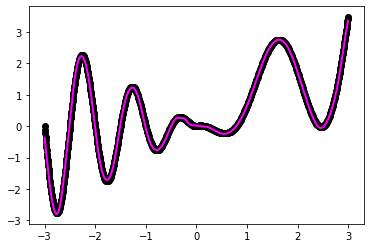

In [80]:
y=f3(x)
model = baseline_model()
model.fit(x,y,epochs=200,verbose=0)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='magenta', linewidth=2)
plt.show()